In [370]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [200]:
data=pd.read_csv("supermarket_sales-Sheet1.csv")

In [201]:
data.head(7)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [202]:
data=data.drop('Invoice ID',axis=1)

In [203]:
print(data.columns)
print(f'There are {len(data.columns)} columns')

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')
There are 16 columns


In [204]:
features=data.iloc[:,:-1]

In [205]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

As I dropped the Invoice ID column and the Rating Column which is the output I will consider it later in the analysis...There're 15 columns

There 're 8 columns representing Categorical Data:
-  Branch                   
-  City                    
-  Customer type           
-  Gender                  
-  Product line  
- Date                     
- Time                    
- Payment 

There 're 7 columns representing Numerical Data:
-  cogs                     
-  gross margin percentage 
-  gross income               
-  Unit price             
-   Quantity               
-  Tax 5%                   
-  Total                    



We can convert the two Date and Time columns to Numerical data:


In [206]:

features['Date']=features['Date'].apply(pd.to_datetime)
features['Time']=features['Time'].apply(pd.to_datetime, format='%H:%M').dt.hour

In [207]:
features['Month']=features['Date'].apply(pd.to_datetime).dt.month
features['year']=features['Date'].apply(pd.to_datetime).dt.year
features['Day']=features['Date'].apply(pd.to_datetime).dt.day


In [208]:
features.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Month,year,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,1,2019,5
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,3,2019,8
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,3,2019,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,1,2019,27
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,2,2019,8


In [209]:
features['year'].value_counts()

2019    1000
Name: year, dtype: int64

Since all data in 2019 so i'll drop the column ['year'] and also i put the month and time in seperate columns so the Date will also dropped...

In [210]:
features=features.drop('year',axis=1)


In [211]:
features=features.drop('Date',axis=1)

In [212]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Time                     1000 non-null   int64  
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Month                    

Now 10 numerical columns , 6 categorical , 1 Date&Time

In [213]:
print("The Unique Values are:  ")
print("                         ")
print(features.Branch.value_counts())
print("                         ")
print("The Unique Values are: ")
print("                         ")
print(features.City.value_counts())
print("                         ")
print("The Unique Values are: ")
print(features['Customer type'].value_counts())
print("                         ")
print("The Unique Values are: ")
print("                         ")
print(features['Gender'].value_counts())
print("                         ")
print("The Unique Values are: ")
print(features['Product line'].value_counts())

The Unique Values are:  
                         
A    340
B    332
C    328
Name: Branch, dtype: int64
                         
The Unique Values are: 
                         
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
                         
The Unique Values are: 
Member    501
Normal    499
Name: Customer type, dtype: int64
                         
The Unique Values are: 
                         
Female    501
Male      499
Name: Gender, dtype: int64
                         
The Unique Values are: 
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


In [214]:
print("The Unique Values are:  ")
print("                         ")
print(features.Branch.value_counts())
print("                         ")
print("The Unique Values are: ")
print("                         ")
print(features.City.value_counts())

The Unique Values are:  
                         
A    340
B    332
C    328
Name: Branch, dtype: int64
                         
The Unique Values are: 
                         
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Notice that the number of unique values in ['Branch,City'] are the same so Obviously,We conclude that There's a single branch in each city, However We'll drop the column['Branch']


In [215]:
features=features.drop('Branch',axis=1)

In [216]:
features.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13,Ewallet,522.83,4.761905,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10,Cash,76.40,4.761905,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13,Credit card,324.31,4.761905,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20,Ewallet,465.76,4.761905,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10,Ewallet,604.17,4.761905,30.2085,2,8


The Unique Values are: 
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


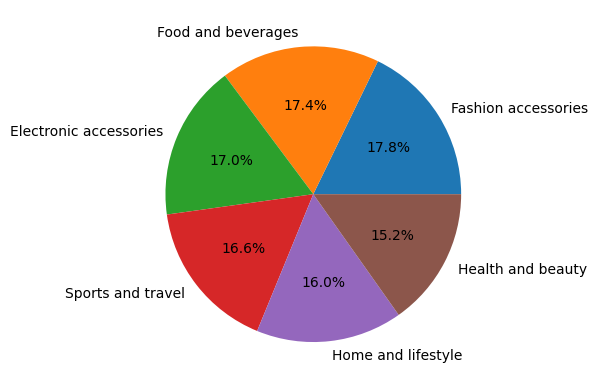

In [217]:
print("The Unique Values are: ")
print(features['Product line'].value_counts())
labels=['Fashion accessories ','Food and beverages','Electronic accessories','Sports and travel','Home and lifestyle','Health and beauty']

plt.pie(features['Product line'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.show()

The data in that feature is considered to be a balanced data

In [218]:
features.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13,Ewallet,522.83,4.761905,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10,Cash,76.40,4.761905,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13,Credit card,324.31,4.761905,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20,Ewallet,465.76,4.761905,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10,Ewallet,604.17,4.761905,30.2085,2,8


Also that analysis is done in three months only Jan,Feb and March. and considering the value counts, The data is balanced althoug it's reasonable to perform the analysis during all year,but as noticed the audit is always during these months.

In [219]:
features['Month'].value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

<AxesSubplot: xlabel='Month', ylabel='count'>

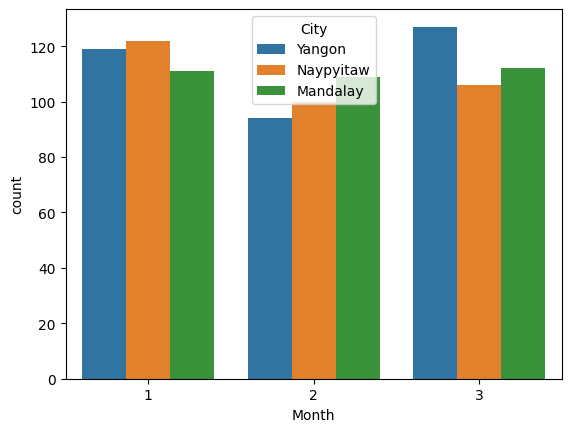

In [220]:
sns.countplot(x='Month',data=features,hue='City')


Female    501
Male      499
Name: Gender, dtype: int64


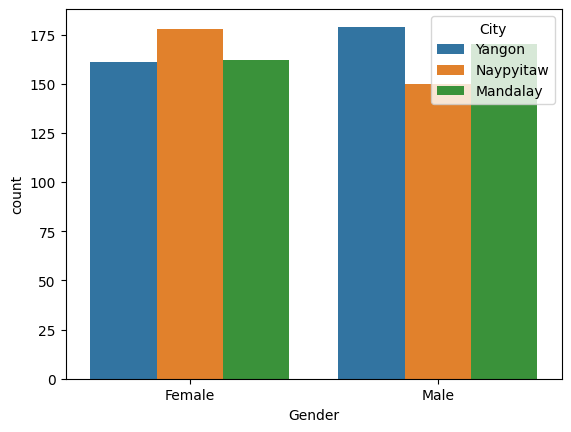

In [221]:
sns.countplot(x='Gender',data=features,hue='City')
print(features['Gender'].value_counts())

Member    501
Normal    499
Name: Customer type, dtype: int64


<AxesSubplot: xlabel='Customer type', ylabel='count'>

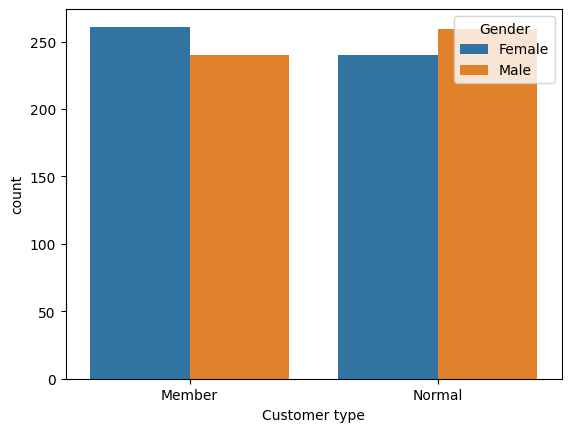

In [222]:
print(features['Customer type'].value_counts())
sns.countplot(x='Customer type',data=features,hue='Gender')

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


<AxesSubplot: xlabel='City', ylabel='count'>

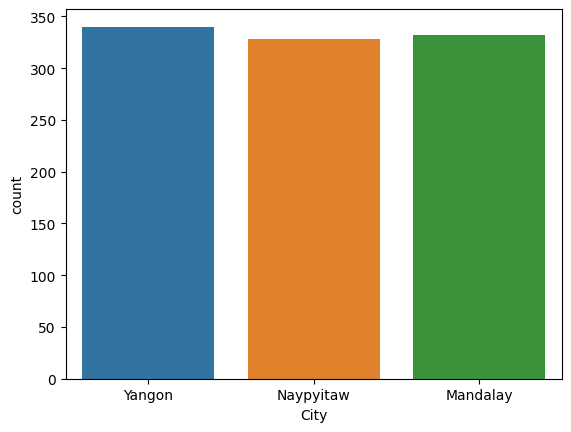

In [223]:
print(features['City'].value_counts())
sns.countplot(x='City',data=features)

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


<AxesSubplot: xlabel='Payment', ylabel='count'>

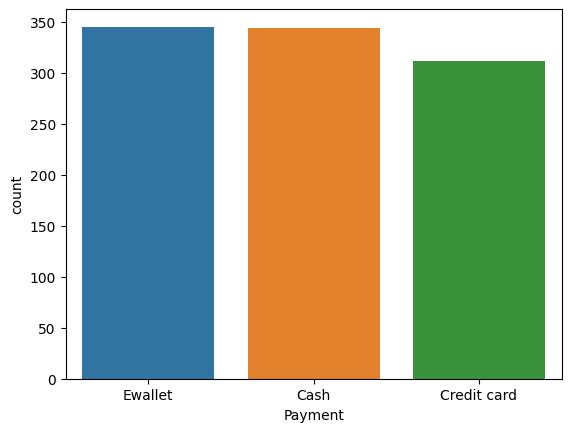

In [224]:
print(features['Payment'].value_counts())
sns.countplot(x='Payment',data=features)

Columns['Gender','Month','Customer type','City','Payemt']can be handled by encoding

Now we nearly cleaned the categorical data but didn't handle them yet,, Let's look at the numerical data before that


In [225]:
features=features.drop('gross margin percentage',axis=1)

In [226]:
data.head(7)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


<AxesSubplot: xlabel='Time', ylabel='Count'>

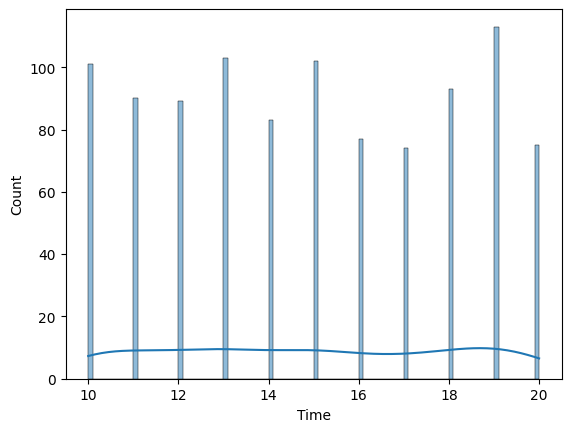

In [227]:
sns.histplot(features['Time'],kde=True,bins=100)

Accoding to the histogram the people visit these branches between 10:00 to 20:00 .. Lowest visits lies at 17:00

<AxesSubplot: xlabel='City', ylabel='Tax 5%'>

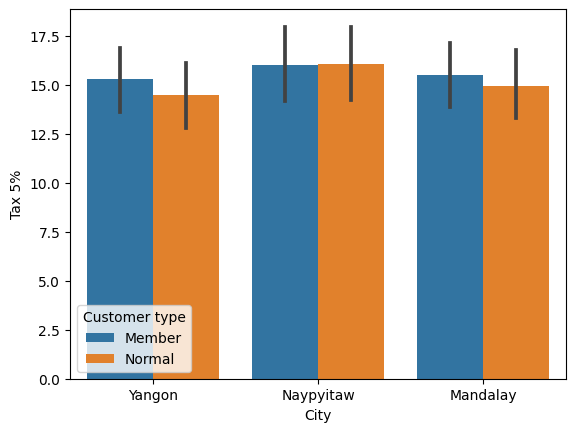

In [228]:
sns.barplot(x=features['City'],y=features['Tax 5%'],hue=features['Customer type'])

In [229]:
data['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

In [230]:
features['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

In Naypyitaw city has the higher percentage of taxes applied but how these taxes in Yangon and Mandalay are applied on the Members not the normal customer ... However it's not a big difference.

Also There's a relation between some numerical columns 

Where : Unit price * Quantity = cogs ,,, cogs+Tax 5%= Total Where the Tax5% == gross income .....So any other data rather these two equation can be neglected or replaced


In [231]:
len(features['Unit price'])

1000

In [232]:
features['cogs']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: cogs, Length: 1000, dtype: float64

In [233]:
features['product_UQ'] = features.apply(lambda row: row['Unit price'] * row['Quantity'], axis=1)

In [234]:
features['product_UQ']

0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: product_UQ, Length: 1000, dtype: float64

That function is only to check the validity of the data:

In [235]:
k=0
features['data_check']=features['Gender']
for i , j in zip(features['cogs'],features['product_UQ']):
    
    if int(i) ==int(j):

        features['data_check'][k]=True
       
    else: 
        features['data_check'][k]=False
        print(i,j)
    k=k+1
    
    

C:\Users\20101\AppData\Local\Temp\ipykernel_17296\2589346741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['data_check'][k]=True


In [236]:
features['data_check'].value_counts()

True    1000
Name: data_check, dtype: int64

In [237]:
k=0
features['data_check_income']=features['Gender']
for i , j in zip(features['Tax 5%'],features['gross income']):
    
    if int(i) ==int(j):

        features['data_check_income'][k]=True
       
    else: 
        features['data_check_income'][k]=False
        print(i,j)
    k=k+1

C:\Users\20101\AppData\Local\Temp\ipykernel_17296\3046867191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['data_check_income'][k]=True


In [238]:
 features['data_check_income'].value_counts()

True    1000
Name: data_check_income, dtype: int64

The data is valid and the only profit for the supermarket comes from the taxes....

In [239]:
features=features.drop(['data_check','data_check_income'],axis=1)

In [240]:
##i will drop the Unit price and the Quantity price columns as their product is cogs:
features=features.drop(['Unit price','Quantity'],axis=1)

In [241]:
features.head()

,City,Customer type,Gender,Product line,Tax 5%,Total,Time,Payment,cogs,gross income,Month,Day,product_UQ
0,Yangon,Member,Female,Health and beauty,26.1415,548.9715,13,Ewallet,522.83,26.1415,1,5,522.83
1,Naypyitaw,Normal,Female,Electronic accessories,3.8200,80.2200,10,Cash,76.40,3.8200,3,8,76.40
2,Yangon,Normal,Male,Home and lifestyle,16.2155,340.5255,13,Credit card,324.31,16.2155,3,3,324.31
3,Yangon,Member,Male,Health and beauty,23.2880,489.0480,20,Ewallet,465.76,23.2880,1,27,465.76
4,Yangon,Normal,Male,Sports and travel,30.2085,634.3785,10,Ewallet,604.17,30.2085,2,8,604.17


In [242]:
features=features.drop(['product_UQ'],axis=1)

In [243]:
features.head()

,City,Customer type,Gender,Product line,Tax 5%,Total,Time,Payment,cogs,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,26.1415,548.9715,13,Ewallet,522.83,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,3.8200,80.2200,10,Cash,76.40,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,16.2155,340.5255,13,Credit card,324.31,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,23.2880,489.0480,20,Ewallet,465.76,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,30.2085,634.3785,10,Ewallet,604.17,30.2085,2,8


I will also drop the tax 5% as it's repeated column as features['gross income']

In [244]:
features=features.drop(['Tax 5%'],axis=1)

In [245]:
features.head()

,City,Customer type,Gender,Product line,Total,Time,Payment,cogs,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,548.9715,13,Ewallet,522.83,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,10,Cash,76.40,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,340.5255,13,Credit card,324.31,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,489.0480,20,Ewallet,465.76,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,634.3785,10,Ewallet,604.17,30.2085,2,8


Iwanna see the relation between both the price of goods and Taxes 

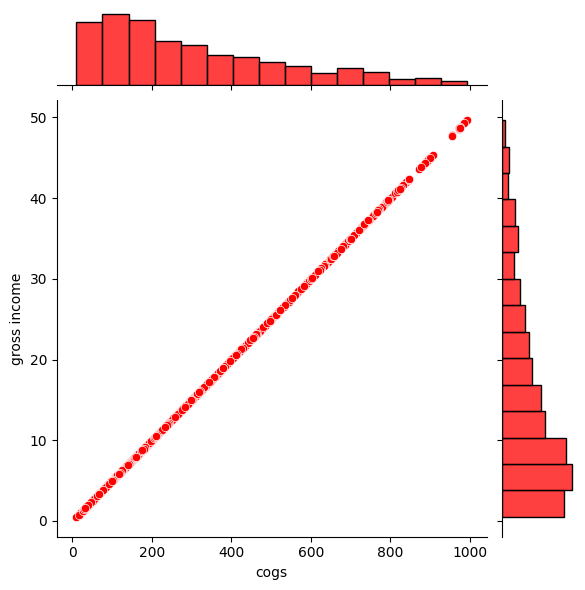

In [246]:
sns.jointplot(x=features['cogs'],y=features['gross income'],color='r')

From the plot we can observe that it's a clear linar proportional relation between the price of goods and the Taxes, Also the skewed distribution of both COGS and Taxes are obvious were people tend to buy less priced products that

<AxesSubplot: xlabel='gross income', ylabel='Count'>

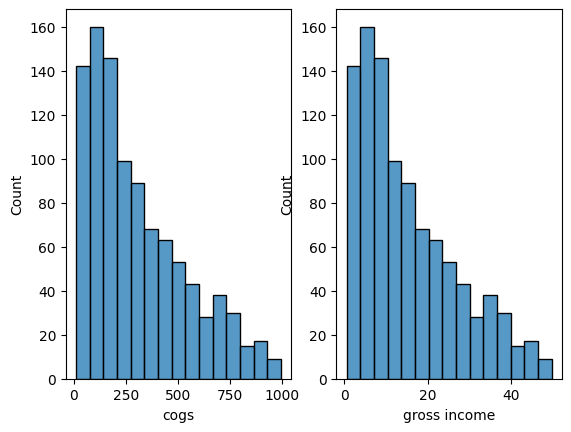

In [247]:
plt.subplot(1,2,1)
sns.histplot(features['cogs'])
plt.subplot(1,2,2)
sns.histplot(features['gross income'])

C:\Users\20101\AppData\Local\Temp\ipykernel_17296\1147686198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['cogs'])
C:\Users\20101\AppData\Local\Temp\ipykernel_17296\1147686198.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['gross income'])


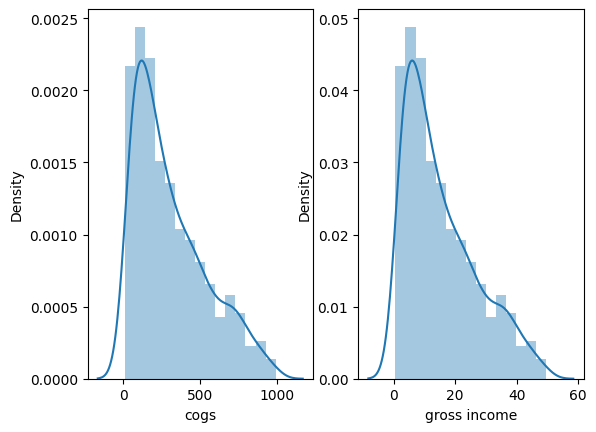

In [248]:
plt.subplot(1,2,1)
sns.distplot(features['cogs'])
plt.subplot(1,2,2)
sns.distplot(features['gross income'])
plt.show()

<AxesSubplot: xlabel='City', ylabel='Total'>

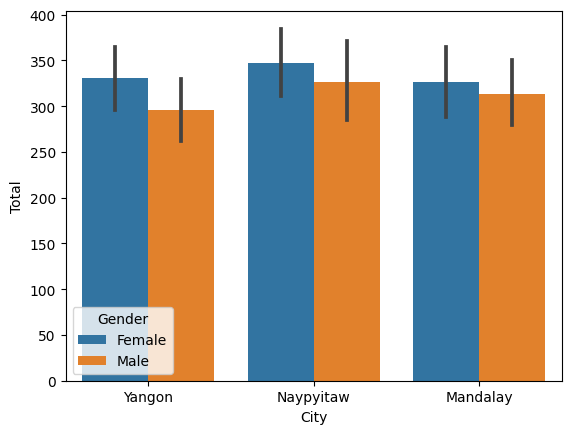

In [249]:
sns.barplot(x=features['City'],y=features['Total'],hue=features['Gender'])

Highest paid branch is Naypyitaw City, Females bought more than males

<AxesSubplot: xlabel='City', ylabel='Total'>

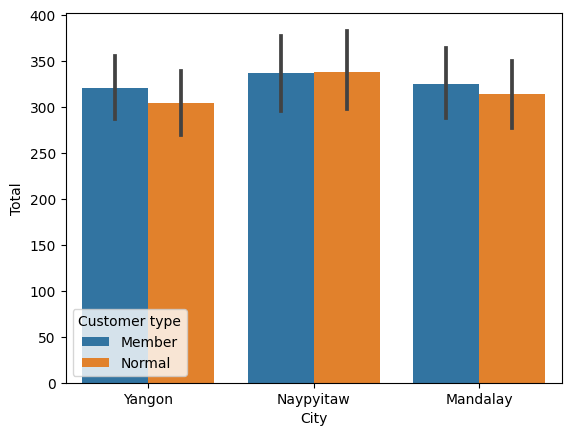

In [250]:
sns.barplot(x=features['City'],y=features['Total'],hue=features['Customer type'])

The customer type doesnt effect that much

In [251]:
Numerical=data[['Total','cogs','gross income','Rating']]

<AxesSubplot: xlabel='Product line', ylabel='Total'>

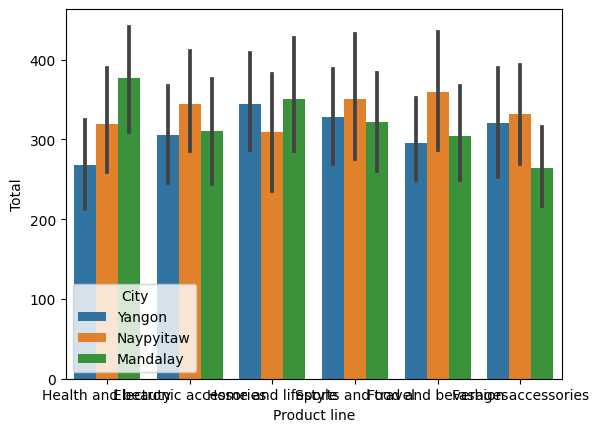

In [252]:
sns.barplot(x=features['Product line'],y=features['Total'],hue=features['City'])

Here we can find the most seller goods in each city .. and focus onthese things for further analysis.

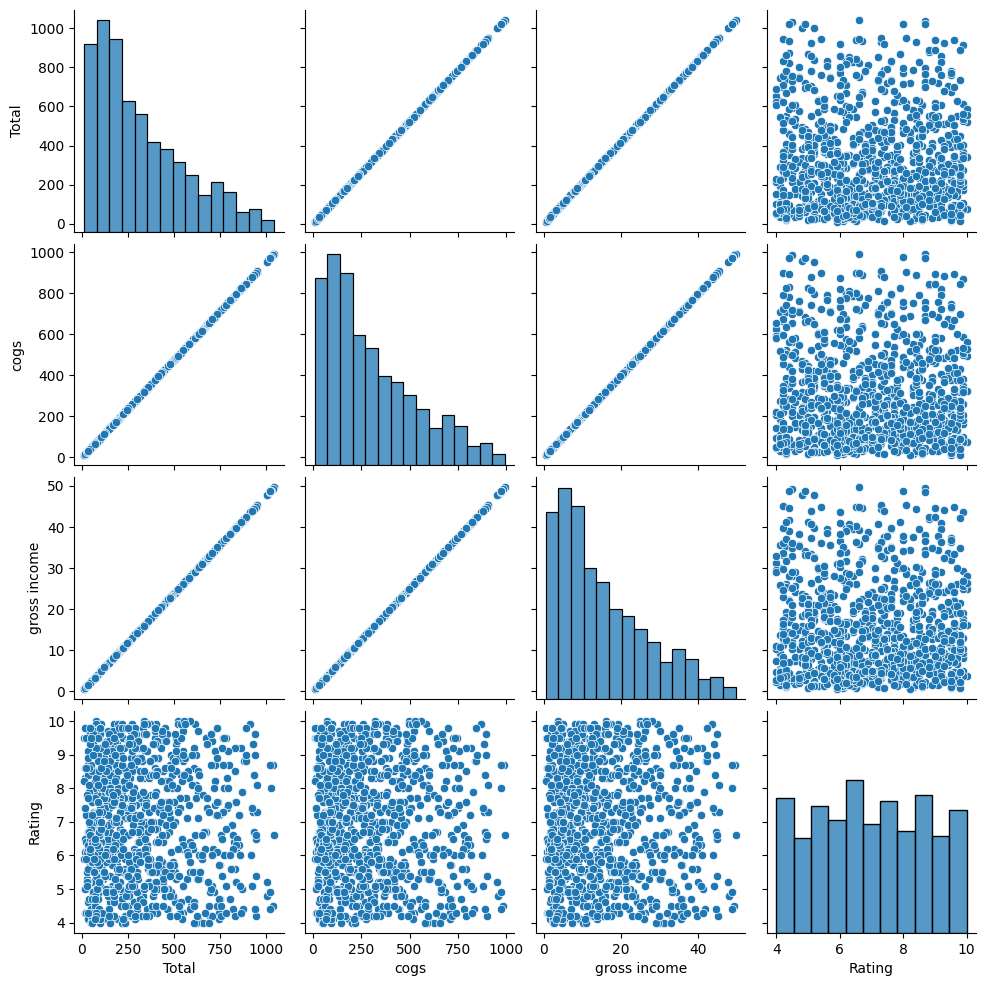

In [253]:
sns.pairplot(Numerical)

Now as you can see the Relation between Rating and the rest as the price of either cogs or Taxes(i.e gross income) decreases the Rating increases and that's obvious,Let's see the rating in the Different branches

<AxesSubplot: xlabel='City', ylabel='Rating'>

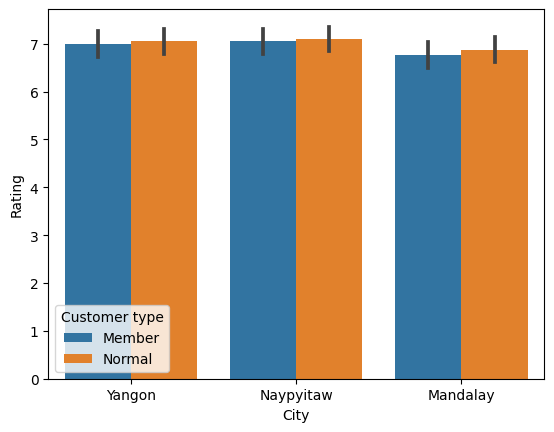

In [254]:
sns.barplot(x=features['City'],y=data['Rating'],hue=features['Customer type'])

[Text(0, 0, 'Health and beauty'),
 Text(1, 0, 'Electronic accessories'),
 Text(2, 0, 'Home and lifestyle'),
 Text(3, 0, 'Sports and travel'),
 Text(4, 0, 'Food and beverages'),
 Text(5, 0, 'Fashion accessories')]

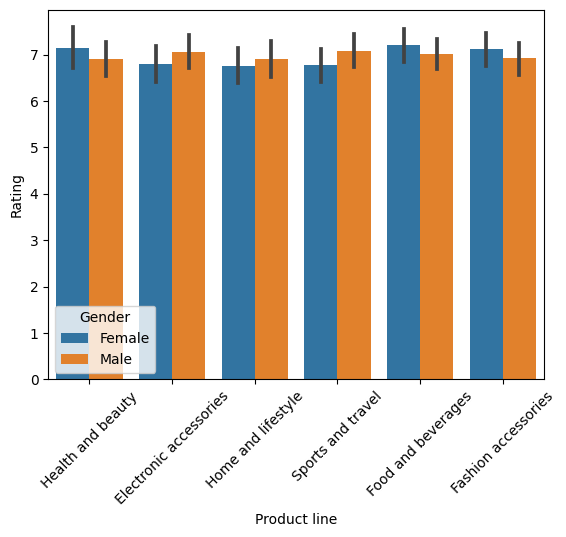

In [255]:
plot=sns.barplot(x=features['Product line'],y=data['Rating'],hue=features['Gender'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)



C:\Users\20101\AppData\Local\Temp\ipykernel_17296\4210425635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(),cmap='crest',annot=True, linewidth=.5)


<AxesSubplot: >

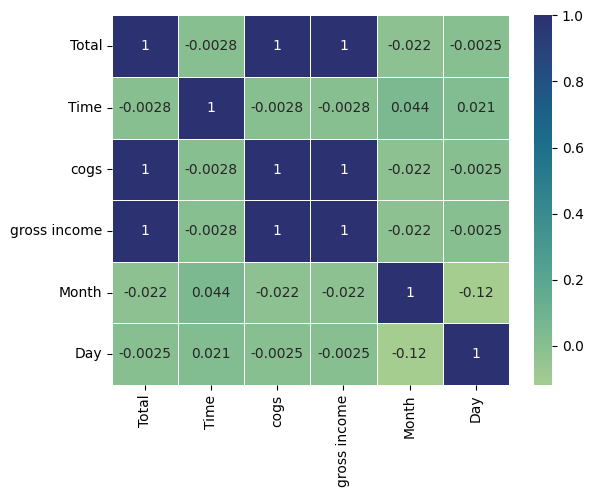

In [256]:
sns.heatmap(features.corr(),cmap='crest',annot=True, linewidth=.5)

Reasonable ratings i might say.

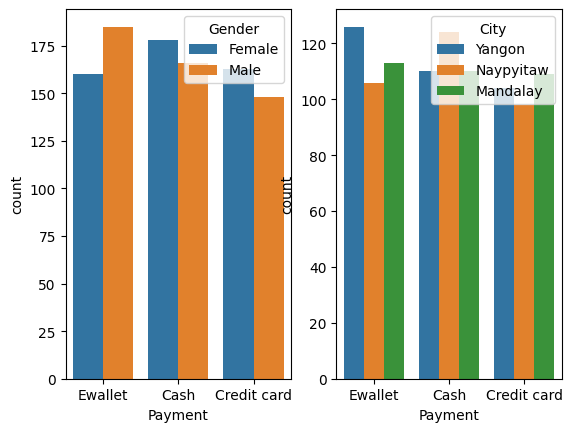

In [257]:
plt.subplot(1,2,1)

sns.countplot(x=features['Payment'],hue=features['Gender'])

plt.subplot(1,2,2)
sns.countplot(x=features['Payment'],hue=features['City'])
plt.show()

Here we see the preferable ways of Payement 

In [258]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
Time,1000.0,14.910000,3.186857,10.0000,12.000000,15.000,18.00000,20.00
cogs,1000.0,307.587380,234.176510,10.1700,118.497500,241.760,448.90500,993.00
gross income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Month,1000.0,1.993000,0.835254,1.0000,1.000000,2.000,3.00000,3.00
Day,1000.0,15.256000,8.693563,1.0000,8.000000,15.000,23.00000,31.00


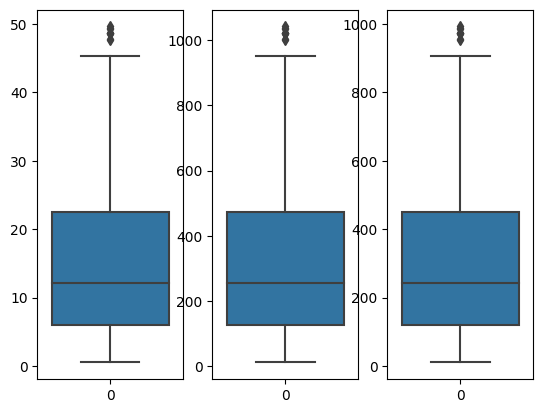

In [259]:

plt.subplot(1,3,1)

sns.boxplot(data['gross income'])

plt.subplot(1,3,2)
sns.boxplot(data['Total'])

plt.subplot(1,3,3)
sns.boxplot(data['cogs'])
plt.show()


In [260]:
first_quartile=features['cogs'].quantile(0.25)
third_quartile=features['cogs'].quantile(0.75)
IQR=third_quartile-first_quartile

In [261]:
high_boundary_outliers=third_quartile+1.5*IQR

In [262]:
high_outliers=features.drop(features[features['cogs'] > high_boundary_outliers].index,axis=0,inplace=True)

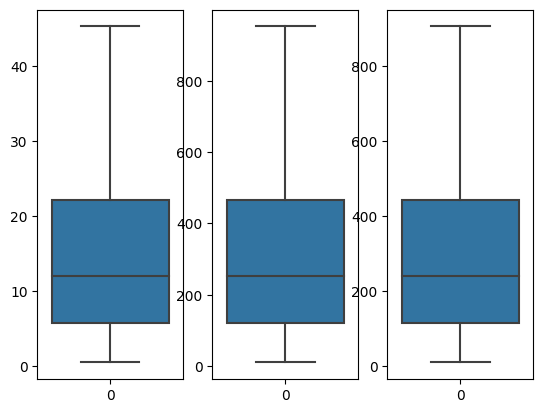

In [263]:
plt.subplot(1,3,1)

sns.boxplot(features['gross income'])

plt.subplot(1,3,2)
sns.boxplot(features['Total'])

plt.subplot(1,3,3)
sns.boxplot(features['cogs'])
plt.show()

Now, I fixed all the numerical data by dropping the outliers ,Let's fix the categorical data,,,,,

In [264]:
features.head()

,City,Customer type,Gender,Product line,Total,Time,Payment,cogs,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,548.9715,13,Ewallet,522.83,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,10,Cash,76.40,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,340.5255,13,Credit card,324.31,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,489.0480,20,Ewallet,465.76,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,634.3785,10,Ewallet,604.17,30.2085,2,8


In [265]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [266]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,991.0,316.604752,237.709589,10.6785,122.1675,252.756,464.667,951.825
Time,991.0,14.909183,3.193716,10.0000,12.0000,15.000,18.000,20.000
cogs,991.0,301.528335,226.390085,10.1700,116.3500,240.720,442.540,906.500
gross income,991.0,15.076417,11.319504,0.5085,5.8175,12.036,22.127,45.325
Month,991.0,1.996973,0.835446,1.0000,1.0000,2.000,3.000,3.000
Day,991.0,15.278507,8.701163,1.0000,8.0000,15.000,23.000,31.000


In [ ]:
features=features.drop(['gross margin percentage'],axis=1)

In [ ]:
features=features.drop(['year'],axis=1)

In [ ]:
features=features.drop(['gross margin percentage'],axis=1)

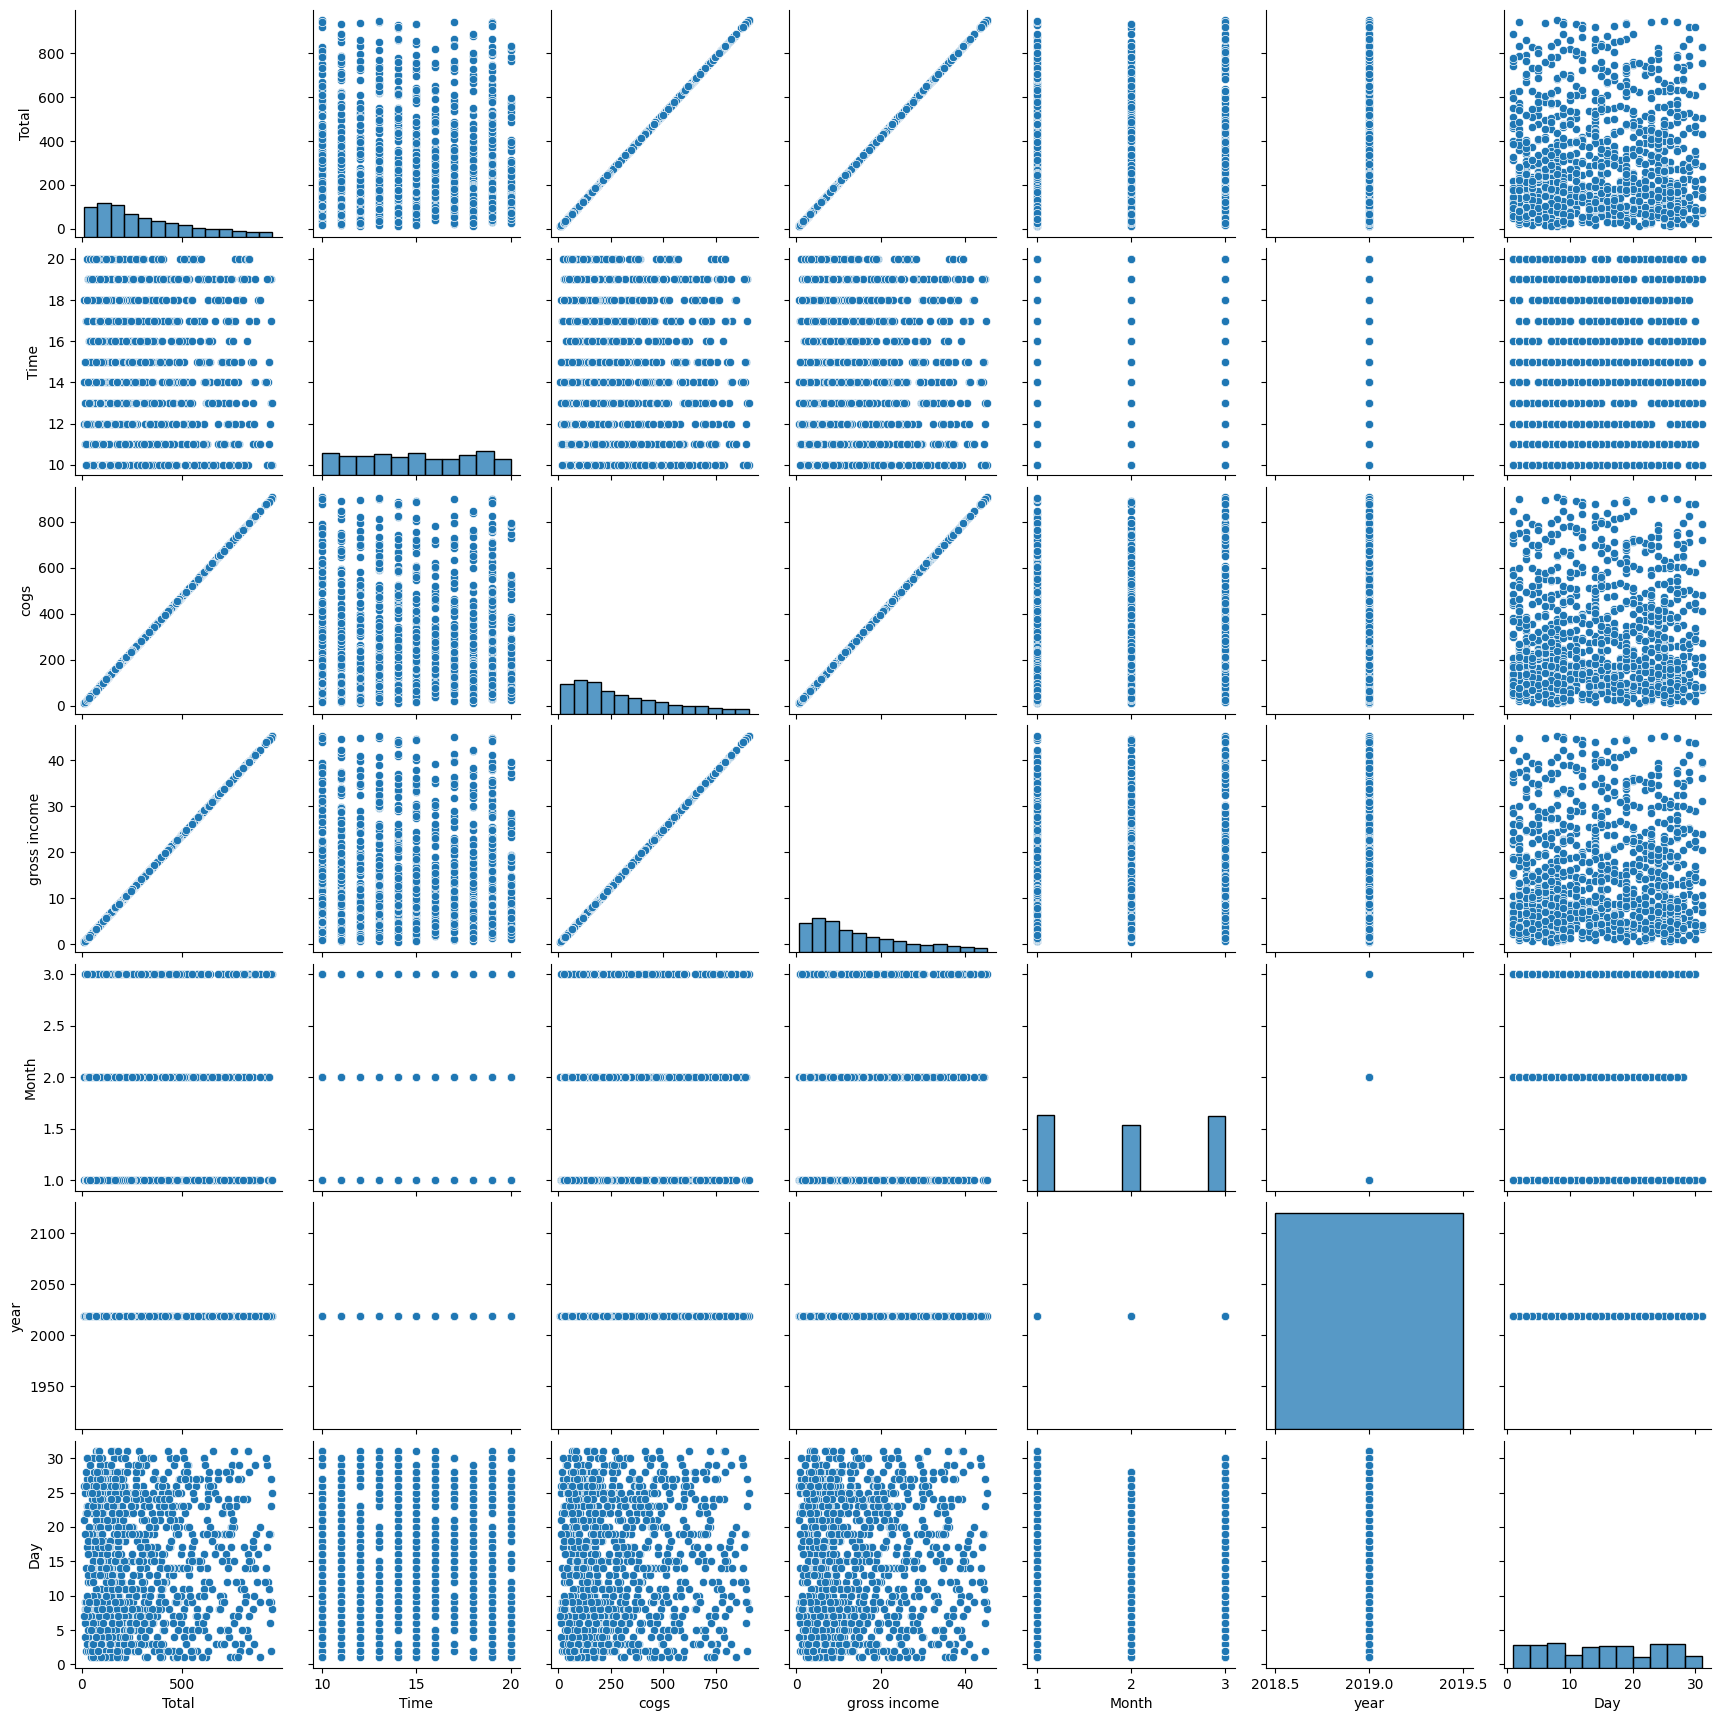

In [ ]:
sns.pairplot(features)

My last analysis is i'll perform one Hot encoding on all the categoricalfeatures and scaling all the numerical features,,,Then i'll start my model & i will remove the date features as i found the very weak correlatio between the day and the Rating as the monthly data is arleady balanced all in one year 

In [ ]:
features.head()

,City,Customer type,Gender,Product line,Total,Time,Payment,cogs,gross income
0,Yangon,Member,Female,Health and beauty,548.9715,13,Ewallet,522.83,26.1415
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,10,Cash,76.40,3.8200
2,Yangon,Normal,Male,Home and lifestyle,340.5255,13,Credit card,324.31,16.2155
3,Yangon,Member,Male,Health and beauty,489.0480,20,Ewallet,465.76,23.2880
4,Yangon,Normal,Male,Sports and travel,634.3785,10,Ewallet,604.17,30.2085


In [271]:

one_hot_encoded_data = pd.get_dummies(features, columns = ['City', 'Gender','Customer type',	'Product line','Payment'])
print(one_hot_encoded_data)

        Total  Time    cogs  gross income  Month  Day  City_Mandalay  \
0    548.9715    13  522.83       26.1415      1    5              0   
1     80.2200    10   76.40        3.8200      3    8              0   
2    340.5255    13  324.31       16.2155      3    3              0   
3    489.0480    20  465.76       23.2880      1   27              0   
4    634.3785    10  604.17       30.2085      2    8              0   
..        ...   ...     ...           ...    ...  ...            ...   
994   63.9975    11   60.95        3.0475      2   18              0   
995   42.3675    13   40.35        2.0175      1   29              0   
997   33.4320    13   31.84        1.5920      2    9              0   
998   69.1110    15   65.82        3.2910      2   22              0   
999  649.2990    13  618.38       30.9190      2   18              0   

     City_Naypyitaw  City_Yangon  Gender_Female  ...  Customer type_Normal  \
0                 0            1              1  ...     

In [272]:
features.head()

,City,Customer type,Gender,Product line,Total,Time,Payment,cogs,gross income,Month,Day
0,Yangon,Member,Female,Health and beauty,548.9715,13,Ewallet,522.83,26.1415,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,10,Cash,76.40,3.8200,3,8
2,Yangon,Normal,Male,Home and lifestyle,340.5255,13,Credit card,324.31,16.2155,3,3
3,Yangon,Member,Male,Health and beauty,489.0480,20,Ewallet,465.76,23.2880,1,27
4,Yangon,Normal,Male,Sports and travel,634.3785,10,Ewallet,604.17,30.2085,2,8


In [274]:
one_hot_encoded_data=one_hot_encoded_data.drop(['Month','Day'],axis=1)

In [275]:
one_hot_encoded_data

,Total,Time,cogs,gross income,City_Mandalay,City_Naypyitaw,City_Yangon,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,548.9715,13,522.83,26.1415,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,80.2200,10,76.40,3.8200,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0
2,340.5255,13,324.31,16.2155,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,489.0480,20,465.76,23.2880,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1
4,634.3785,10,604.17,30.2085,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,63.9975,11,60.95,3.0475,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1
995,42.3675,13,40.35,2.0175,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
997,33.4320,13,31.84,1.5920,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
998,69.1110,15,65.82,3.2910,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0


Let's Perform scaling on numerical data:

In [ ]:
## in order to choose the propper type of scaling i wanna know the distribution of the numerical data

<AxesSubplot: xlabel='cogs', ylabel='Count'>

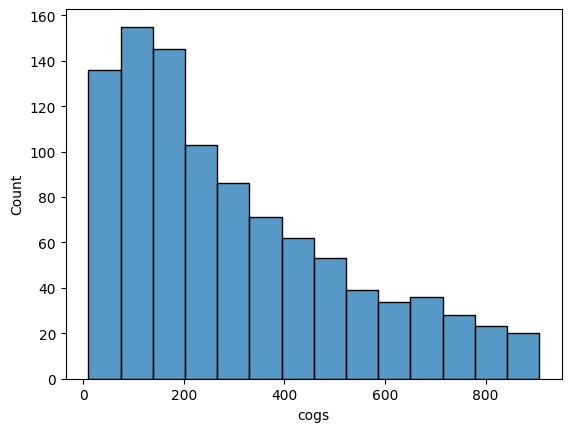

In [279]:
sns.histplot(one_hot_encoded_data, x="cogs")

In [280]:
##since all the numerical data except "Time" is skewed i will perform log tranformation scaling


In [289]:
one_hot_encoded_data['Total']=features['Total']

In [290]:
one_hot_encoded_data['cogs']=features['cogs']
one_hot_encoded_data['gross income']=features['gross income']


In [292]:
one_hot_encoded_data

,Total,Time,cogs,gross income,City_Mandalay,City_Naypyitaw,City_Yangon,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,548.9715,13,522.83,26.1415,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,80.2200,10,76.40,3.8200,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0
2,340.5255,13,324.31,16.2155,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,489.0480,20,465.76,23.2880,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1
4,634.3785,10,604.17,30.2085,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,63.9975,11,60.95,3.0475,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1
995,42.3675,13,40.35,2.0175,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
997,33.4320,13,31.84,1.5920,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
998,69.1110,15,65.82,3.2910,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0


In [309]:
##Normalization 
from sklearn.preprocessing import Normalizer
col=one_hot_encoded_data[['Total',	'Time',	'cogs',	'gross income']]
st=Normalizer()
new=st.fit_transform(col)
print(new[0][0])

0.7236015371876846


In [310]:
one_hot_encoded_data[['Total',	'Time',	'cogs',	'gross income']]=new

In [311]:
one_hot_encoded_data

,Total,Time,cogs,gross income,City_Mandalay,City_Naypyitaw,City_Yangon,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.723602,0.017135,0.689144,0.034457,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0.720781,0.089850,0.686458,0.034323,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0
2,0.723432,0.027618,0.688983,0.034449,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,0.723391,0.029584,0.688944,0.034447,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1
4,0.723661,0.011407,0.689201,0.034460,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.718173,0.123441,0.683974,0.034199,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1
995,0.706498,0.216781,0.672855,0.033643,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
997,0.696648,0.270891,0.663475,0.033174,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
998,0.714942,0.155173,0.680897,0.034045,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0


Finally i can say that my Dataset is ready and is fully cleaned to my knowlegde 

Now let's split the data

In [312]:
x=one_hot_encoded_data

In [318]:
y=data['Rating']

In [324]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [337]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,recall_score,precision_score,f1_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [329]:
regressor=DecisionTreeRegressor()

In [331]:
model=regressor.fit(x_train,y_train)

In [332]:
y_predict_treeRegressor=model.predict(x_test)

In [339]:
##knn regressor 
neigh = KNeighborsRegressor()
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [340]:
y_predict_knnRegressor=neigh.predict(x_test)

In [ ]:
y_test

<AxesSubplot: >

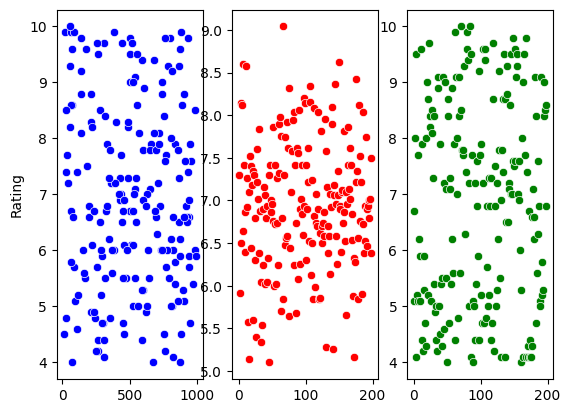

In [352]:
plt.subplot(1,3,1)

sns.scatterplot(y_test,color='b')

plt.subplot(1,3,2)
sns.scatterplot(y_predict_knnRegressor,color='r')

plt.subplot(1,3,3)

sns.scatterplot(y_predict_treeRegressor,color='g')



In [387]:
print(mean_squared_error(y_test,y_predict_knnRegressor))
print(mean_squared_error(y_test,y_predict_treeRegressor))

print(mean_absolute_error(y_test,y_predict_knnRegressor))
print(mean_absolute_error(y_test,y_predict_treeRegressor))


3.1625728643216084
6.66708542713568
1.4490452261306532
2.106030150753769


In [382]:
from sklearn.model_selection import *
#  Select an algorithm
algorithm = KNeighborsRegressor()
# Create 3 folds

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(x, y)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

-0.11611313597013055
KNeighborsRegressor(n_neighbors=6)
{'n_neighbors': 6, 'weights': 'uniform'}


In [386]:
neigh_modified = KNeighborsRegressor(n_neighbors= 6, weights= 'uniform')
neigh_modified.fit(x_train, y_train)
y_predict_knnRegressor_modified=neigh_modified.predict(x_test)

print(r2_score(y_test,y_predict_knnRegressor_modified))
print(mean_squared_error(y_test,y_predict_knnRegressor_modified))
print(mean_squared_error(y_test,y_predict_knnRegressor))
print(mean_absolute_error(y_test,y_predict_knnRegressor_modified))
print(mean_absolute_error(y_test,y_predict_knnRegressor))

-0.12736666087350912
3.1024329983249586
3.1625728643216084
1.440787269681742
1.4490452261306532


In [396]:
print("   M.S.E      Before",mean_squared_error(y_test,y_predict_knnRegressor))
print("              After",mean_squared_error(y_test,y_predict_knnRegressor_modified))

print("----------------------------------------------------")
print("     M.A.E    Before",mean_absolute_error(y_test,y_predict_knnRegressor))
print("              After",mean_absolute_error(y_test,y_predict_knnRegressor_modified))

   M.S.E      Before 3.1625728643216084
              After 3.1024329983249586
----------------------------------------------------
     M.A.E    Before 1.4490452261306532
              After 1.440787269681742
